<a href="https://colab.research.google.com/github/amod404/Practice_Project/blob/main/Review_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
!pip install transformers

In [1]:
!pip install kaggle

Importing the dependencies from kaggle

In [1]:
import os
import json

from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, Bidirectional, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip imdb-dataset-of-50k-movie-reviews.zip


Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [6]:
!ls

'IMDB Dataset.csv'			 kaggle.json
 imdb-dataset-of-50k-movie-reviews.zip	 sample_data


In [74]:
data = pd.read_csv("/content/IMDB Dataset.csv")

In [75]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [76]:
data["sentiment"] = data["sentiment"].map({"positive": 1, "negative": 0})


In [77]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [78]:
data["sentiment"].value_counts()

,count
sentiment,
1,25000
0,25000


In [79]:
X = data["review"]
y = data["sentiment"]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [81]:
X_train.shape

(40000,)

In [82]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")

tokenizer.fit_on_texts(X_train)
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=200)

In [83]:
print(X_train.shape)

(40000, 200)


In [84]:
print(X_test.shape)

(10000, 200)


Building the LSTM model

In [88]:
model = Sequential()
model.add(Embedding(5000, 128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

In [89]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [90]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 207s 408ms/step - accuracy: 0.7000 - loss: 0.5493 - val_accuracy: 0.8309 - val_loss: 0.3749
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 260s 404ms/step - accuracy: 0.8180 - loss: 0.4033 - val_accuracy: 0.8472 - val_loss: 0.3511
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 262s 405ms/step - accuracy: 0.8768 - loss: 0.3095 - val_accuracy: 0.8658 - val_loss: 0.3161
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 261s 402ms/step - accuracy: 0.8917 - loss: 0.2760 - val_accuracy: 0.8620 - val_loss: 0.3396
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 403ms/step - accuracy: 0.9079 - loss: 0.2392 - val_accuracy: 0.8710 - val_loss: 0.3201


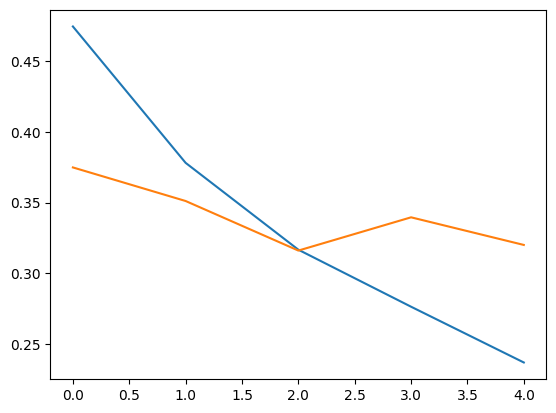

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [92]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 114ms/step - accuracy: 0.8776 - loss: 0.3040
Test Accuracy: 0.8775
